In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
sns.set(style="darkgrid")

# Question 1

$\begin{align*}
f(x_{i+1})  &= f(x_i) + f^{'}(x_i)h + \dfrac{f^{''}(x_i)}{2!}h^2 + \dots \tag{1}\\
f(x_{i-1})  &= f(x_i) - f^{'}(x_i)h + \dfrac{f^{''}(x_i)}{2!}h^2 + \dots \tag{2}\\
\\
\text{from (1) (2):}\\
f^{'}(x_i)  &= \dfrac{f(x_{i+1}) - f(x_{i-1})}{2h} - \dfrac{f^{(3)}(x_i)}{3!}h^2 + O(h^3) \\
f^{''}(x_i) &\cong \dfrac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2} \\
f^{(3)}(x_i)&\cong \dfrac{f^{''}(x_{i+1}) - f^{''}(x_{i-1})}{2h} \\
            &= \dfrac{1}{2h}\Big[\dfrac{f(x_{i+2}) - 2f(x_{i+1}) + f(x_i)}{h^2} - \dfrac{f(x_{i}) - 2f(x_{i-1}) + f(x_{i-2})}{h^2}\Big]\\
            &= \dfrac{f(x_{i+2}) - 2f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2}) }{2h^3}\\
\therefore f^{'}(x_i) &\cong  \dfrac{f(x_{i+1}) - f(x_{i-1})}{2h} -  \dfrac{f(x_{i+2}) - 2f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2}) }{12h^3}h^2  \\
            &= \dfrac{-f(x_{i+2}) + 8f(x_{i+1}) - 8f(x_{i-1}) + f(x_{i-2})}{12h} , Q.E.D.
\end{align*}$

# Question 2
### $f_1(x) = 0.2 + 25x − 200x^2 + 675x^3$ and $f_2(x) = 0.2 + 25x − 200x^2 + 675x^3 − 900x^4$

### 1. Change of variables: $x = 0.4+0.4x_d$ and $dx = 0.4d(x_d)$

### 2. $\int^{0.8}_0f(x)dx = \int^1_{-1}f(x_d)0.4d(x_d)$

### 3.
#### 3.1 $\int^{0.8}_0f_1(x)dx = 0.4 \times (f_1(x_d = \frac{-1}{\sqrt{3}}) + f_1(x_d = \frac{1}{\sqrt{3}})) \cong 43.1466666666667$ 
#### 3.2 $\int^{0.8}_0f_1(x)dx = 0.4 \times (f_2(x_d = \frac{-1}{\sqrt{3}}) + f_2(x_d = \frac{1}{\sqrt{3}})) \cong -14.197333333333347$ 

### 4.
#### 4.1 True value of integral of $f_1(x)$ in $[0,0.8] = 43.14666666666668$, relative error $\approx 0$
#### 4.2 True value of integral of $f_2(x)$ in $[0,0.8] = -15.83573333333333$, relative error $= 0.10346221204364707$

In [19]:
def q2_f_1(x):
    x = 0.4 + 0.4*x
    return 0.2 + 25*x - 200*(x**2) + 675 *(x**3) 

print((q2_f_1(-1/np.sqrt(3)) + q2_f_1(1/np.sqrt(3)))*0.4)

43.1466666666667


In [20]:
def q2_f_2(x):
    x = 0.4 + 0.4*x
    return 0.2 + 25*x - 200*(x**2) + 675 *(x**3) - 900*(x**4)

print((q2_f_2(-1/np.sqrt(3)) + q2_f_2(1/np.sqrt(3)))*0.4)

-14.197333333333347


In [21]:
def q2_f_1_int(x):
    return 0.2*x + (1/2)*25*(x**2) - (1/3)*200*(x**3) + (1/4)*675 *(x**4)
print(q2_f_1_int(0.8) - q2_f_1_int(0))

43.14666666666668


In [22]:
def q2_f_2_int(x):
    return 0.2*x + (1/2)*25*(x**2) - (1/3)*200*(x**3) + (1/4)*675 *(x**4) - (1/5)*900*(x**5)
print(q2_f_2_int(0.8) - q2_f_2_int(0))

-15.83573333333333


In [23]:
def relative_error(true_value, approx_value):
    return (true_value - approx_value)/true_value

print(relative_error(q2_f_1_int(0.8) - q2_f_1_int(0), (q2_f_1(-1/np.sqrt(3)) + q2_f_1(1/np.sqrt(3)))*0.4))
print(relative_error(q2_f_2_int(0.8) - q2_f_2_int(0), (q2_f_2(-1/np.sqrt(3)) + q2_f_2(1/np.sqrt(3)))*0.4))

-3.2936158950560874e-16
0.10346221204364707


# Question 3

## a.
#### Download csv from https://covidtracking.com/api & use mathplotlib to plot

In [24]:
data = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv").fillna(0)
data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200608,56,1952401,18662902.0,1606.0,29969.0,217581.0,6394.0,9013.0,3240.0,...,2020-06-08T00:00:00Z,20616909,20615303,20615303,640,675,363385,16240,379625,0ff46ef88d8fb642ba583bf70303247897963052
1,20200607,56,1936161,18299517.0,1733.0,30299.0,216906.0,6493.0,8957.0,3298.0,...,2020-06-07T00:00:00Z,20237411,20235678,20235678,453,647,427219,19932,447151,5f6979262beb8a9cfd142ddfeb3cfaa94cab7e4f
2,20200606,56,1916229,17872298.0,1796.0,30909.0,216259.0,6754.0,8920.0,3476.0,...,2020-06-06T00:00:00Z,19790323,19788527,19788527,746,1007,517091,23062,540153,f2540c8d958b7647d63cbe7a50209e861aeaa260
3,20200605,56,1893167,17355207.0,1749.0,31335.0,215252.0,6912.0,8863.0,3523.0,...,2020-06-05T00:00:00Z,19250123,19248374,19248374,1100,1440,517298,28392,545690,8a6347d0d8e20dfede26ddd4265eb36923178d00
4,20200604,56,1864775,16837909.0,3474.0,31659.0,213812.0,7054.0,8787.0,3665.0,...,2020-06-04T00:00:00Z,18706158,18702684,18702684,884,-2828,439394,20540,459934,c93b7399aca9ff1af0861397b09744eb6586fe9c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,20200126,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-26T00:00:00Z,1,1,1,0,0,0,0,0,defee0e146ae049c86c14a5e580c6219add8e92f
135,20200125,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-25T00:00:00Z,1,1,1,0,0,0,0,0,ca2013db2fa6a2b1a2c776b85d5fcd5e1ca64722
136,20200124,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-24T00:00:00Z,1,1,1,0,0,0,0,0,738e6d4a52f6d0895318ad9eda0d965d09feeb70
137,20200123,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-23T00:00:00Z,1,1,1,0,0,0,0,0,680d664781c7080c1171f160145dafc31e3b93af


In [210]:
tmp_data = pd.concat([pd.Series(np.array(data['death'])[0]),data['death'][data['death']!=0] , pd.Series(np.zeros(6))] ,ignore_index=True).to_numpy()
tmp_data

array([1.05040e+05, 1.05040e+05, 1.04400e+05, 1.03947e+05, 1.03201e+05,
       1.02101e+05, 1.01217e+05, 1.00246e+05, 9.90780e+04, 9.86000e+04,
       9.79330e+04, 9.69630e+04, 9.57780e+04, 9.44920e+04, 9.31770e+04,
       9.25410e+04, 9.20050e+04, 9.13500e+04, 9.02630e+04, 8.89780e+04,
       8.75470e+04, 8.61610e+04, 8.47390e+04, 8.39520e+04, 8.30980e+04,
       8.18090e+04, 8.03200e+04, 7.84150e+04, 7.67280e+04, 7.52120e+04,
       7.43650e+04, 7.33690e+04, 7.18450e+04, 7.00790e+04, 6.73390e+04,
       6.53960e+04, 6.28870e+04, 6.19590e+04, 6.07820e+04, 5.91430e+04,
       5.74060e+04, 5.52720e+04, 5.25650e+04, 5.04540e+04, 4.92550e+04,
       4.81420e+04, 4.63520e+04, 4.44920e+04, 4.26760e+04, 4.06340e+04,
       3.81000e+04, 3.63780e+04, 3.46890e+04, 3.29010e+04, 3.08290e+04,
       2.86840e+04, 2.61850e+04, 2.38760e+04, 2.23370e+04, 2.07780e+04,
       1.88350e+04, 1.67420e+04, 1.48040e+04, 1.28980e+04, 1.09840e+04,
       9.76900e+03, 8.53500e+03, 7.15400e+03, 5.95200e+03, 4.844

In [230]:
death_in_7_days = tmp_data[6:]
#death_in_7_days = tmp_data[0:-6] + tmp_data[1:-5] + tmp_data[2:-4] + tmp_data[3:-3] + tmp_data[4:-2] + tmp_data[5:-1] + tmp_data[6:]
for i in range(6):
    death_in_7_days = [x+y for (x,y) in zip(death_in_7_days,tmp_data[i:(i-6)])]

In [236]:
average_death_in_7_days = np.array([x/7 for x in death_in_7_days][::-1])
dates_of_death_in_7_days= data['date'].loc[average_death_in_7_days.nonzero()][::-1]

In [237]:
average_death_in_7_days

array([2.85714286e-01, 5.71428571e-01, 1.14285714e+00, 1.85714286e+00,
       3.00000000e+00, 4.57142857e+00, 6.57142857e+00, 8.57142857e+00,
       1.11428571e+01, 1.42857143e+01, 1.74285714e+01, 2.07142857e+01,
       2.41428571e+01, 2.74285714e+01, 3.12857143e+01, 3.57142857e+01,
       3.98571429e+01, 4.50000000e+01, 5.15714286e+01, 6.05714286e+01,
       7.24285714e+01, 8.72857143e+01, 1.07142857e+02, 1.35714286e+02,
       1.70571429e+02, 2.22142857e+02, 2.82714286e+02, 3.69428571e+02,
       4.84714286e+02, 6.33857143e+02, 8.27285714e+02, 1.07628571e+03,
       1.37671429e+03, 1.74214286e+03, 2.19571429e+03, 2.75142857e+03,
       3.42542857e+03, 4.21757143e+03, 5.14400000e+03, 6.17657143e+03,
       7.30571429e+03, 8.59085714e+03, 1.00137143e+04, 1.15551429e+04,
       1.32238571e+04, 1.49728571e+04, 1.67682857e+04, 1.86100000e+04,
       2.05081429e+04, 2.24910000e+04, 2.45034286e+04, 2.65128571e+04,
       2.85001429e+04, 3.05060000e+04, 3.25380000e+04, 3.46021429e+04,
      

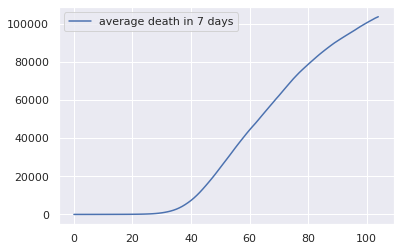

In [238]:
#x = data['date']
x = np.arange(len(average_death_in_7_days))
plt.plot(x,average_death_in_7_days, label='average death in 7 days')
plt.legend()

In [245]:
date_in_str = pd.DatetimeIndex([str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:] for x in dates_of_death_in_7_days])

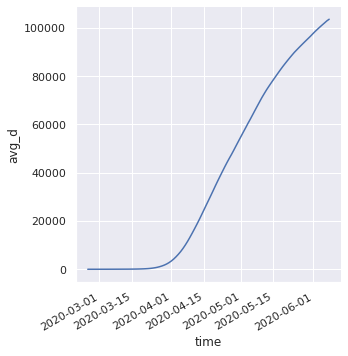

In [240]:
df = pd.DataFrame(dict(time = date_in_str, avg_d = average_death_in_7_days))
g = sns.relplot(x="time", y="avg_d", kind="line", data=df)
g.fig.autofmt_xdate()

## b.

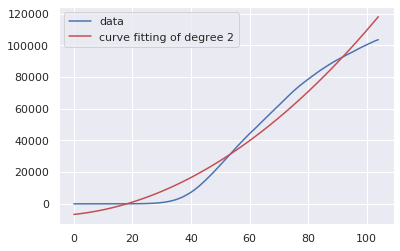

Prediction of tomorrow prediction: 120247.54135129784


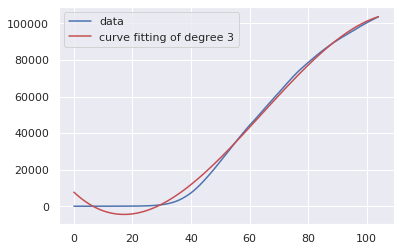

Prediction of tomorrow prediction: 104150.85292793733


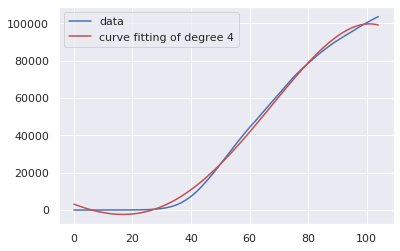

Prediction of tomorrow prediction: 98655.93033479284


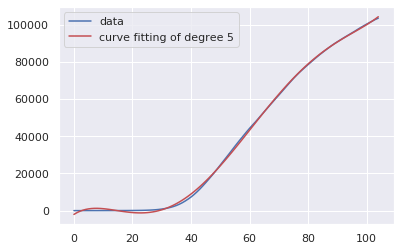

Prediction of tomorrow prediction: 105570.70395797495


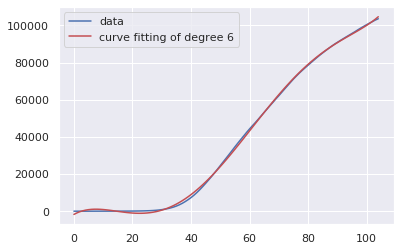

Prediction of tomorrow prediction: 106033.63362156057


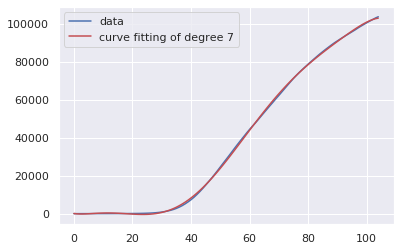

Prediction of tomorrow prediction: 102959.70526563074


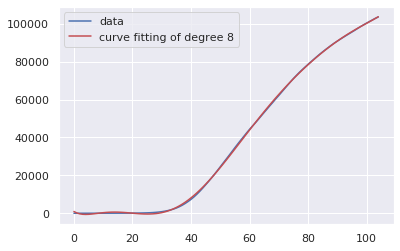

Prediction of tomorrow prediction: 104659.00150863975


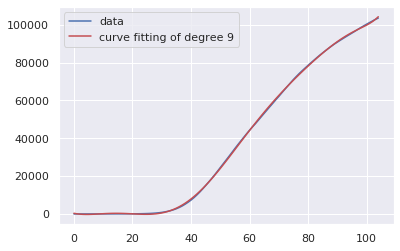

Prediction of tomorrow prediction: 106038.55273705286


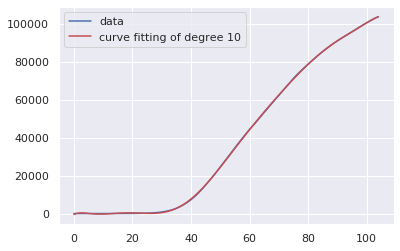

Prediction of tomorrow prediction: 103775.39569050063


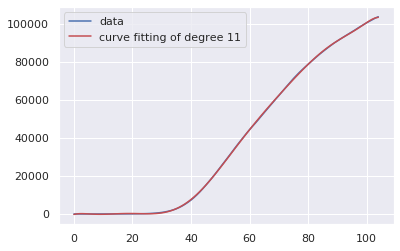

Prediction of tomorrow prediction: 102960.22589253816


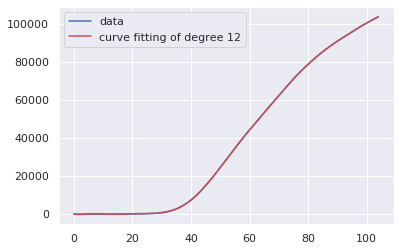

Prediction of tomorrow prediction: 104678.76041344565


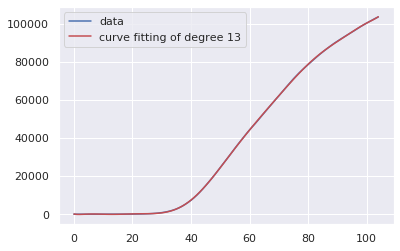

Prediction of tomorrow prediction: 105013.85635435692


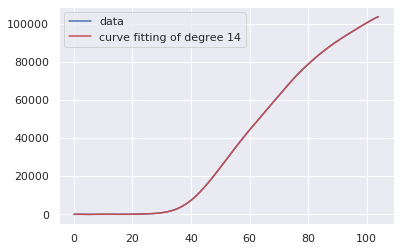

Prediction of tomorrow prediction: 103790.0504659586


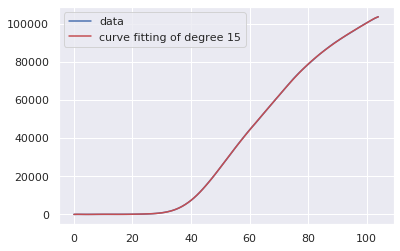

Prediction of tomorrow prediction: 103475.30590140566


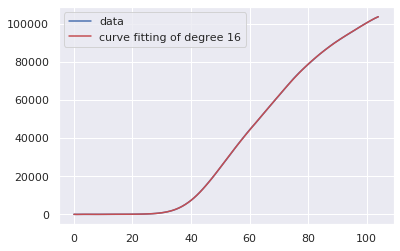

Prediction of tomorrow prediction: 104101.64169979942


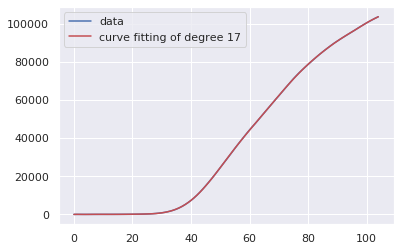

Prediction of tomorrow prediction: 104711.95769057349


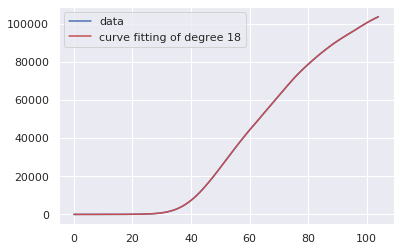

Prediction of tomorrow prediction: 105122.82970826361


/home/tl32rodan/anaconda3/envs/numeric_intro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


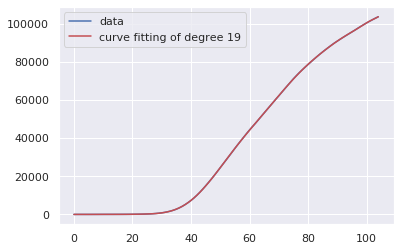

Prediction of tomorrow prediction: 105115.94812240828


/home/tl32rodan/anaconda3/envs/numeric_intro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


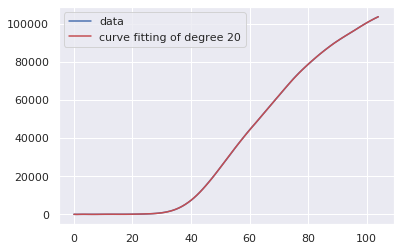

Prediction of tomorrow prediction: 104402.7765340245


In [244]:
sample_days = len(average_death_in_7_days)

x = np.arange(sample_days)
y = average_death_in_7_days

for i in range(2,21):
    
    popt = np.polyfit(x, y,i)
    p = np.poly1d(popt)
    
    plt.plot(x,y, 'b-', label='data') # original data
    plt.plot(x,p(x),'r-', label='curve fitting of degree {}'.format(i)) # result of curve fitting
    plt.legend()
    plt.show()

    print("Prediction of tomorrow prediction:", p(sample_days))
    

### Based on prediction of curve fitting, we can observe that , although the prediction death number of next day varies, the prediction value are closed. I think the reason may be that the death number is about monotonically increasing, so nearly all polynomials have got near values.

# 4